Original b coefficients: [0.00391613 0.00783225 0.00391613]
Quantized b coefficients: [0.003916126646799967, 0.007832253322703764, 0.003916126646799967]
b coefficient deviations: [ 1.37474025e-11 -1.60902541e-12  1.37474025e-11]
Original a coefficients: [ 1.         -1.81534108  0.83100559]
Quantized a coefficients: [1.0, -1.815341082692612, 0.8310055893380195]
a coefficient deviations: [ 0.00000000e+00 -1.19559918e-11  8.73801032e-12]
Average deviation for 35 bits: 0.00%
Average deviation for 24 bits: 0.00%
Average deviation for 16 bits: 0.06%
Average deviation for 8 bits: 0.16%


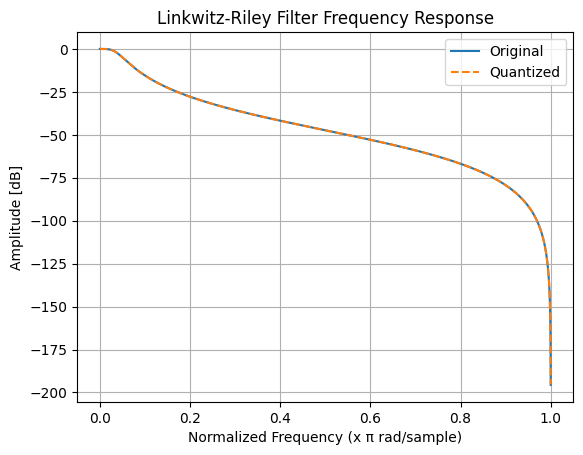

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Define the sampling rate and the crossover frequency
fs = 48000  # Hz
fc = 1000   # Hz

# Calculate the 2nd order Butterworth filter coefficients (Linkwitz-Riley is two cascaded Butterworth filters)
b, a = signal.butter(2, 2*fc/fs, btype='low', analog=False)

# Function to quantize coefficients to a given number of bits
def quantize_coefficients(coefficients, bits=35):
    resolution = 2**(-bits)
    quantized = np.round(np.array(coefficients) / resolution) * resolution
    return quantized.tolist()

# Quantize coefficients
b_quantized = quantize_coefficients(b)
a_quantized = quantize_coefficients(a)

# Calculate deviation
b_deviation = np.array(b) - np.array(b_quantized)
a_deviation = np.array(a) - np.array(a_quantized)

# Print out the results
print("Original b coefficients:", b)
print("Quantized b coefficients:", b_quantized)
print("b coefficient deviations:", b_deviation)
print("Original a coefficients:", a)
print("Quantized a coefficients:", a_quantized)
print("a coefficient deviations:", a_deviation)

# Plot the frequency response of both the original and quantized filters for comparison
w, h_original = signal.freqz(b, a, worN=8000)
w, h_quantized = signal.freqz(b_quantized, a_quantized, worN=8000)

def average_deviation_percentage(original, quantized):
    deviation = np.abs(np.array(original) - np.array(quantized))
    percentage_deviation = (deviation / np.abs(original)) * 100
    return np.mean(percentage_deviation)

bit_depths = [35, 24, 16, 8]  # Different bit depths for testing
average_deviations = []

for bits in bit_depths:
    b_quantized = quantize_coefficients(b, bits)
    a_quantized = quantize_coefficients(a, bits)
    avg_dev_b = average_deviation_percentage(b, b_quantized)
    avg_dev_a = average_deviation_percentage(a, a_quantized)
    average_deviations.append((avg_dev_b + avg_dev_a) / 2)

# Print the average deviation for different bit depths
for bits, deviation in zip(bit_depths, average_deviations):
    print(f"Average deviation for {bits} bits: {deviation:.2f}%")

plt.plot(w / np.pi, 20 * np.log10(abs(h_original)), label='Original')
plt.plot(w / np.pi, 20 * np.log10(abs(h_quantized)), label='Quantized', linestyle='--')
plt.title('Linkwitz-Riley Filter Frequency Response')
plt.xlabel('Normalized Frequency (x π rad/sample)')
plt.ylabel('Amplitude [dB]')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
from scipy import signal

# Define the function to calculate the Linkwitz-Riley filter coefficients with maximum precision
def calculate_linkwitz_riley_coefficients(fs, fc, order):
    # Linkwitz-Riley filters are created by cascading two Butterworth filters of the same order
    b, a = signal.butter(order // 2, 2 * fc / fs, btype='low', analog=False)
    return b, a

# Define the function to quantize the coefficients to a specific bit precision
def quantize_coefficients(coefficients, bits):
    resolution = 2 ** (-bits)
    quantized = np.round(np.array(coefficients) / resolution) * resolution
    return quantized

# Define the function to calculate the deviations
def calculate_deviations(original, quantized):
    deviations = np.abs(np.array(original) - np.array(quantized))
    percentage_deviations = (deviations / np.abs(np.array(original))) * 100
    return deviations, percentage_deviations

# Sampling rate and cutoff frequency
fs = 48000  # Hz
fc = 1000   # Hz
order = 4   # 4th order Linkwitz-Riley filter

# Calculate the original coefficients
b_orig, a_orig = calculate_linkwitz_riley_coefficients(fs, fc, order)

# Quantize the coefficients to 35 bits
b_quantized = quantize_coefficients(b_orig, 35)
a_quantized = quantize_coefficients(a_orig, 35)

# Calculate the deviations
b_dev, b_dev_perc = calculate_deviations(b_orig, b_quantized)
a_dev, a_dev_perc = calculate_deviations(a_orig, a_quantized)

# Display the results
print("Original b coefficients:", b_orig)
print("Quantized b coefficients:", b_quantized)
print("b coefficient deviations:", b_dev)
print("b coefficient percentage deviations:", b_dev_perc)
print("Original a coefficients:", a_orig)
print("Quantized a coefficients:", a_quantized)
print("a coefficient deviations:", a_dev)
print("a coefficient percentage deviations:", a_dev_perc)

# Calculate the average deviation in percentage
average_deviation_percentage = (np.mean(b_dev_perc) + np.mean(a_dev_perc)) / 2
print("Average deviation in percentage:", average_deviation_percentage)


Original b coefficients: [0.00391613 0.00783225 0.00391613]
Quantized b coefficients: [0.00391613 0.00783225 0.00391613]
b coefficient deviations: [1.37474025e-11 1.60902541e-12 1.37474025e-11]
b coefficient percentage deviations: [3.51045911e-07 2.05435824e-08 3.51045911e-07]
Original a coefficients: [ 1.         -1.81534108  0.83100559]
Quantized a coefficients: [ 1.         -1.81534108  0.83100559]
a coefficient deviations: [0.00000000e+00 1.19559918e-11 8.73801032e-12]
a coefficient percentage deviations: [0.00000000e+00 6.58608559e-10 1.05149838e-09]
Average deviation in percentage: 1.2072425197519684e-07


In [ ]:
from scipy import signal

# Define the function to calculate the Linkwitz-Riley filter coefficients with maximum precision
def calculate_linkwitz_riley_coefficients(fs, fc, order):
    # Linkwitz-Riley filters are created by cascading two Butterworth filters of the same order
    b, a = signal.butter(order // 2, 2 * fc / fs, btype='low', analog=False)
    return b, a

# Define the function to quantize the coefficients to the nearest power of two
def quantize_coefficients_to_power_of_two(coefficients):
    # Find the exponent for the closest power of two
    exponents = np.floor(np.log2(np.abs(coefficients)))
    # Calculate the power of two
    quantized = np.copysign(np.power(2.0, exponents), coefficients)
    return quantized

# Define the function to calculate the deviations
def calculate_deviations(original, quantized):
    deviations = np.abs(np.array(original) - np.array(quantized))
    percentage_deviations = (deviations / np.abs(np.array(original))) * 100
    return deviations, percentage_deviations

# Sampling rate and cutoff frequency
fs = 48000  # Hz
fc = 1000   # Hz
order = 4   # 4th order Linkwitz-Riley filter

# Calculate the original coefficients
b_orig, a_orig = calculate_linkwitz_riley_coefficients(fs, fc, order)

# Quantize the coefficients to the nearest power of two
b_quantized = quantize_coefficients_to_power_of_two(b_orig)
a_quantized = quantize_coefficients_to_power_of_two(a_orig)

# Calculate the deviations
b_dev, b_dev_perc = calculate_deviations(b_orig, b_quantized)
a_dev, a_dev_perc = calculate_deviations(a_orig, a_quantized)

# Display the results
print("Original b coefficients:", b_orig)
print("Quantized b coefficients:", b_quantized)
print("b coefficient deviations:", b_dev)
print("b coefficient percentage deviations:", b_dev_perc)
print("Original a coefficients:", a_orig)
print("Quantized a coefficients:", a_quantized)
print("a coefficient deviations:", a_dev)
print("a coefficient percentage deviations:", a_dev_perc)

# Calculate the average deviation in percentage
average_deviation_percentage = (np.mean(b_dev_perc) + np.mean(a_dev_perc)) / 2
print("Average deviation in percentage:", average_deviation_percentage)

Original b coefficients: [0.00391613 0.00783225 0.00391613]
Quantized b coefficients: [0.00390625 0.0078125  0.00390625]
b coefficient deviations: [9.87666055e-06 1.97533211e-05 9.87666055e-06]
b coefficient percentage deviations: [0.25220483 0.25220483 0.25220483]
Original a coefficients: [ 1.         -1.81534108  0.83100559]
Quantized a coefficients: [ 1.  -1.   0.5]
a coefficient deviations: [0.         0.81534108 0.33100559]
a coefficient percentage deviations: [ 0.         44.91393328 39.83193297]
Average deviation in percentage: 14.250413456718702


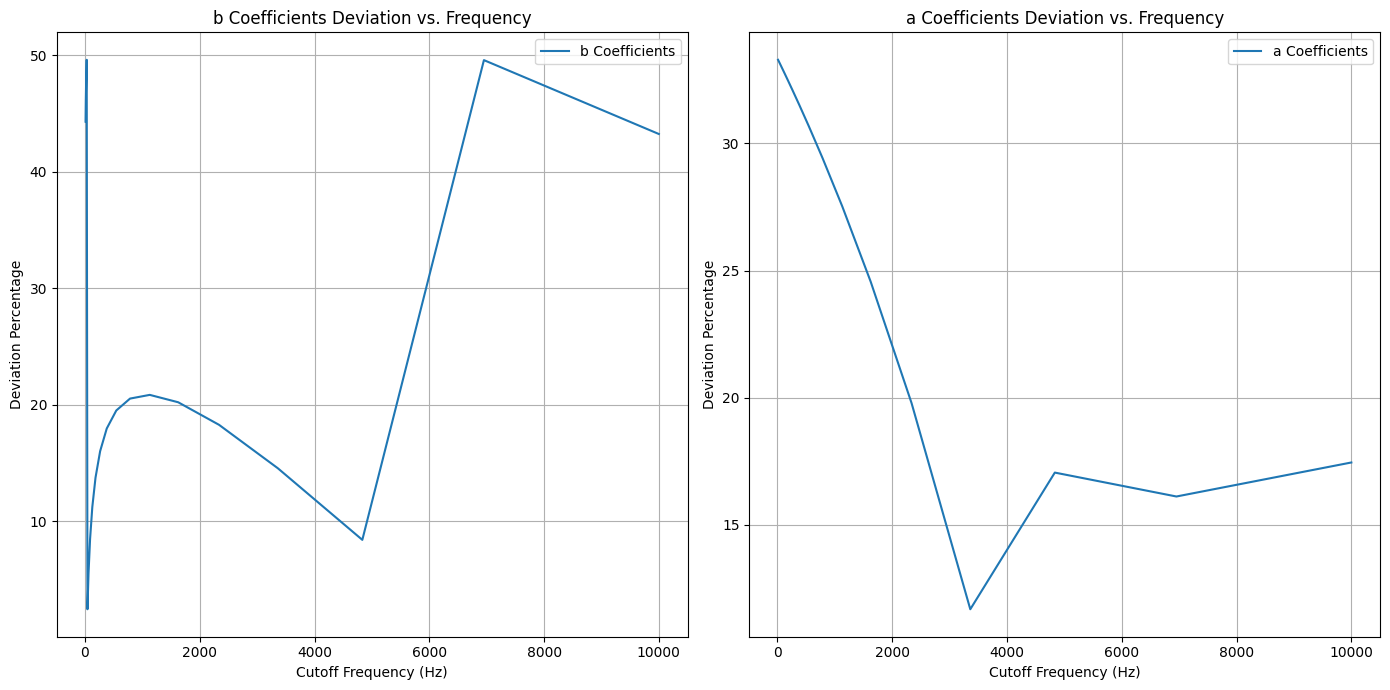

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter

# Define the function to calculate the Linkwitz-Riley filter coefficients with maximum precision
def calculate_linkwitz_riley_coefficients(fs, fc, order):
    # Linkwitz-Riley filters are created by cascading two Butterworth filters of the same order
    b, a = butter(order // 2, 2 * fc / fs, btype='low', analog=False)
    return b, a

# Define the function to quantize the coefficients to the nearest power of two
def quantize_coefficients_to_power_of_two(coefficients):
    # Find the exponent for the closest power of two
    exponents = np.floor(np.log2(np.abs(coefficients)))
    # Calculate the power of two
    quantized = np.copysign(np.power(2.0, exponents), coefficients)
    return quantized

# Define the function to calculate the deviations
def calculate_deviations(original, quantized):
    deviations = np.abs(np.array(original) - np.array(quantized))
    percentage_deviations = (deviations / np.abs(np.array(original))) * 100
    return deviations, percentage_deviations

# Function to calculate and quantize coefficients for multiple cutoff frequencies and return deviations
def calculate_and_plot_deviations(fs, order, freq_range):
    b_dev_perc_list = []
    a_dev_perc_list = []
    average_deviation_percentage_list = []

    for fc in freq_range:
        # Calculate the original coefficients
        b_orig, a_orig = calculate_linkwitz_riley_coefficients(fs, fc, order)

        # Quantize the coefficients to the nearest power of two
        b_quantized = quantize_coefficients_to_power_of_two(b_orig)
        a_quantized = quantize_coefficients_to_power_of_two(a_orig)

        # Calculate the deviations
        b_dev, b_dev_perc = calculate_deviations(b_orig, b_quantized)
        a_dev, a_dev_perc = calculate_deviations(a_orig, a_quantized)
        average_deviation_percentage = (np.mean(b_dev_perc) + np.mean(a_dev_perc)) / 2

        # Store deviations for plotting
        b_dev_perc_list.append(np.mean(b_dev_perc))
        a_dev_perc_list.append(np.mean(a_dev_perc))
        average_deviation_percentage_list.append(average_deviation_percentage)

    # Plotting
    plt.figure(figsize=(14, 7))

    # Plot b coefficient deviations
    plt.subplot(1, 2, 1)
    plt.plot(freq_range, b_dev_perc_list, label='b Coefficients')
    plt.xlabel('Cutoff Frequency (Hz)')
    plt.ylabel('Deviation Percentage')
    plt.title('b Coefficients Deviation vs. Frequency')
    plt.legend()
    plt.grid(True)

    # Plot a coefficient deviations
    plt.subplot(1, 2, 2)
    plt.plot(freq_range, a_dev_perc_list, label='a Coefficients')
    plt.xlabel('Cutoff Frequency (Hz)')
    plt.ylabel('Deviation Percentage')
    plt.title('a Coefficients Deviation vs. Frequency')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return average_deviation_percentage_list

# Sampling rate and cutoff frequency
fs = 48000  # Hz
order = 4   # 4th order Linkwitz-Riley filter
freq_range = np.logspace(1, 4, num=20)  # From 10 Hz to 10,000 Hz

# Calculate and plot the deviations for the range of frequencies
average_deviation_percentages = calculate_and_plot_deviations(fs, order, freq_range)


Original b coefficients: [4.24433681e-05 8.48867363e-05 4.24433681e-05]
Original a coefficients: [ 1.         -1.98148851  0.98165828]

Quantized coefficients with 1 bits:
b: [0. 0. 0.]
a: [ 1. -2.  1.]

Quantized coefficients with 2 bits:
b: [0. 0. 0.]
a: [ 1. -2.  1.]

Quantized coefficients with 3 bits:
b: [0. 0. 0.]
a: [ 1. -2.  1.]

Quantized coefficients with 4 bits:
b: [0. 0. 0.]
a: [ 1. -2.  1.]

Quantized coefficients with 5 bits:
b: [0. 0. 0.]
a: [ 1.      -1.96875  0.96875]

Quantized coefficients with 6 bits:
b: [0. 0. 0.]
a: [ 1.       -1.984375  0.984375]

Quantized coefficients with 7 bits:
b: [0. 0. 0.]
a: [ 1.       -1.984375  0.984375]

Quantized coefficients with 8 bits:
b: [0. 0. 0.]
a: [ 1.         -1.98046875  0.98046875]

Quantized coefficients with 9 bits:
b: [0. 0. 0.]
a: [ 1.         -1.98242188  0.98242188]

Quantized coefficients with 10 bits:
b: [0. 0. 0.]
a: [ 1.         -1.98144531  0.98144531]

Quantized coefficients with 11 bits:
b: [0. 0. 0.]
a: [ 1.  

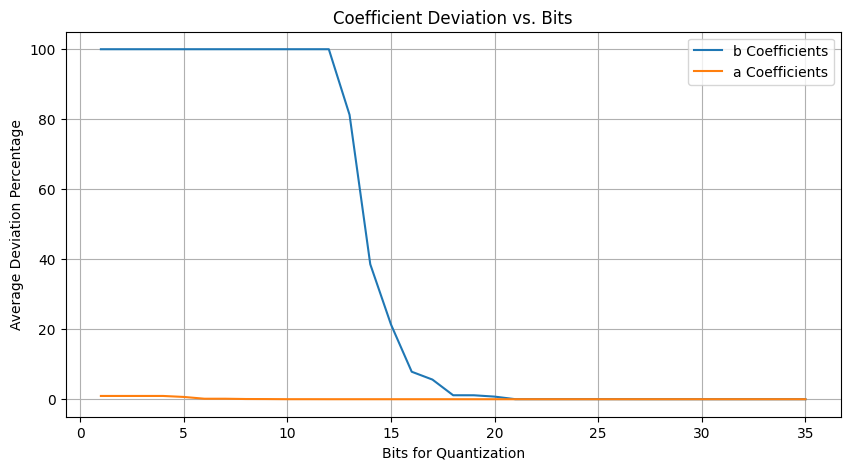

In [ ]:
# Modified function to calculate deviations that returns both the absolute and percentage deviations
def calculate_deviations(original, quantized):
    deviations = np.abs(np.array(original) - np.array(quantized))
    percentage_deviations = (deviations / np.abs(np.array(original))) * 100
    return deviations, percentage_deviations

# Function to calculate and plot deviations for a range of bit precisions and print coefficients
def plot_deviation_vs_bits_and_print_coeffs(fs, fc, order, bit_range):
    b_deviation_percentages = []
    a_deviation_percentages = []

    # Calculate the original coefficients
    b_orig, a_orig = calculate_linkwitz_riley_coefficients(fs, fc, order)

    print("Original b coefficients:", b_orig)
    print("Original a coefficients:", a_orig)

    for bits in bit_range:
        # Quantize the coefficients
        b_quantized = quantize_coefficients(b_orig, bits)
        a_quantized = quantize_coefficients(a_orig, bits)

        # Calculate and store the deviations
        b_dev, b_dev_perc = calculate_deviations(b_orig, b_quantized)
        a_dev, a_dev_perc = calculate_deviations(a_orig, a_quantized)
        b_deviation_percentages.append(np.mean(b_dev_perc))
        a_deviation_percentages.append(np.mean(a_dev_perc))

        # Print the quantized coefficients
        print(f"\nQuantized coefficients with {bits} bits:")
        print("b:", b_quantized)
        print("a:", a_quantized)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(bit_range, b_deviation_percentages, label='b Coefficients')
    plt.plot(bit_range, a_deviation_percentages, label='a Coefficients')
    plt.xlabel('Bits for Quantization')
    plt.ylabel('Average Deviation Percentage')
    plt.title('Coefficient Deviation vs. Bits')
    plt.legend()
    plt.grid(True)
    plt.show()

# Sampling rate, cutoff frequency, and filter order
fs = 48000  # Hz
fc = 100   # Hz
order = 4   # 4th order Linkwitz-Riley filter

# Range of bits for quantization to test
bit_range = range(1, 36)  # From 1 bit to 35 bits

# Plot the deviations for the range of bits and print coefficients
plot_deviation_vs_bits_and_print_coeffs(fs, fc, order, bit_range)

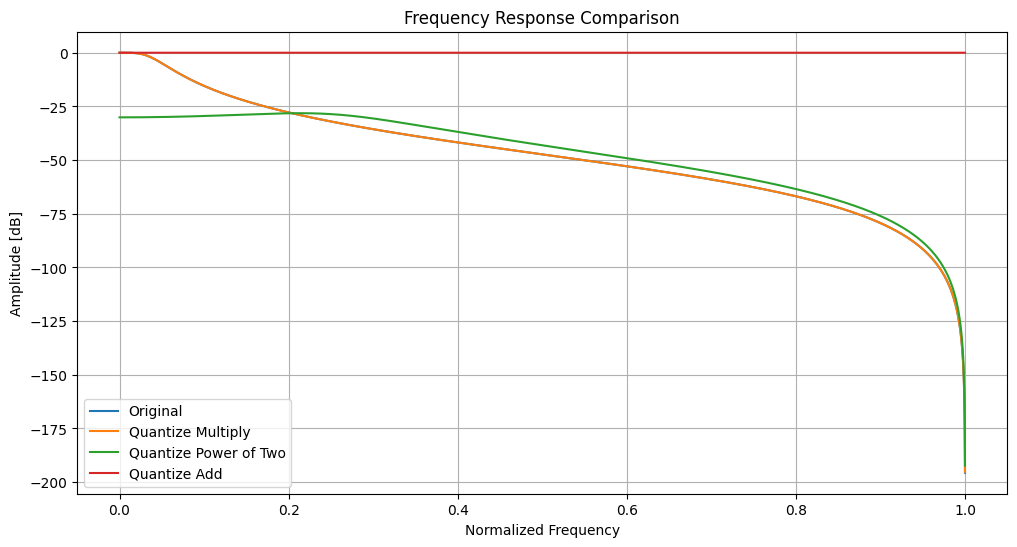

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

# Define the function to calculate the Linkwitz-Riley filter coefficients with maximum precision
def calculate_linkwitz_riley_coefficients(fs, fc, order):
    # Linkwitz-Riley filters are created by cascading two Butterworth filters of the same order
    b, a = butter(order // 2, 2 * fc / fs, btype='low', analog=False)
    return b, a

# Define different quantization methods
def quantize_multiply(coefficients, bits):
    """ Quantize coefficients by multiplying by 2^n """
    scale = 2 ** bits
    return np.round(coefficients * scale) / scale

def quantize_power_of_two(coefficients):
    """ Quantize coefficients to the nearest power of two """
    exponents = np.floor(np.log2(np.abs(coefficients)))
    return np.copysign(np.power(2.0, exponents), coefficients)

def quantize_add_power_of_two(coefficients, bits):
    """ Quantize coefficients by adding 2^n """
    scale = 2 ** bits
    return coefficients + scale

# Plot frequency response for different quantization methods
def plot_frequency_response(b, a, label):
    w, h = freqz(b, a, worN=8000)
    plt.plot(w / np.pi, 20 * np.log10(abs(h)), label=label)

# Sampling rate and cutoff frequency
fs = 48000  # Hz
fc = 1000   # Hz
order = 4   # 4th order Linkwitz-Riley filter

# Calculate original coefficients
b_orig, a_orig = calculate_linkwitz_riley_coefficients(fs, fc, order)

# Apply different quantization methods
bits = 35  # Number of bits for quantization
b_quantized_multiply = quantize_multiply(b_orig, bits)
a_quantized_multiply = quantize_multiply(a_orig, bits)

b_quantized_power_of_two = quantize_power_of_two(b_orig)
a_quantized_power_of_two = quantize_power_of_two(a_orig)

b_quantized_add = quantize_add_power_of_two(b_orig, bits)
a_quantized_add = quantize_add_power_of_two(a_orig, bits)

# Plot the frequency response
plt.figure(figsize=(12, 6))
plot_frequency_response(b_orig, a_orig, 'Original')
plot_frequency_response(b_quantized_multiply, a_quantized_multiply, 'Quantize Multiply')
plot_frequency_response(b_quantized_power_of_two, a_quantized_power_of_two, 'Quantize Power of Two')
plot_frequency_response(b_quantized_add, a_quantized_add, 'Quantize Add')
plt.title('Frequency Response Comparison')
plt.xlabel('Normalized Frequency')
plt.ylabel('Amplitude [dB]')
plt.legend()
plt.grid()
plt.show()


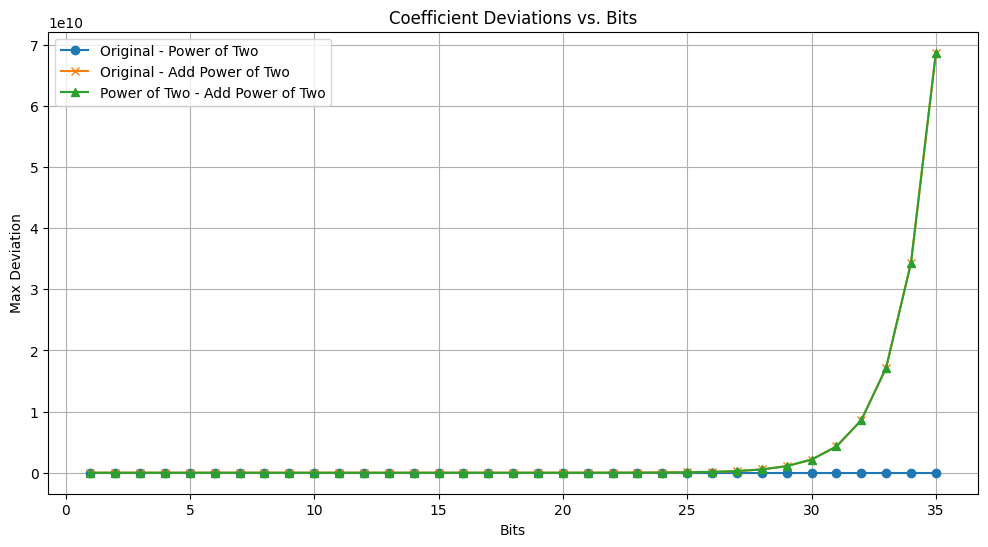

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter

# Define the function to calculate the Linkwitz-Riley filter coefficients with maximum precision
def calculate_linkwitz_riley_coefficients(fs, fc, order):
    # Linkwitz-Riley filters are created by cascading two Butterworth filters of the same order
    b, a = butter(order // 2, 2 * fc / fs, btype='low', analog=False)
    return b, a

# Define different quantization methods
def quantize_power_of_two(coefficients):
    """ Quantize coefficients to the nearest power of two """
    exponents = np.floor(np.log2(np.abs(coefficients)))
    return np.copysign(np.power(2.0, exponents), coefficients)

def quantize_add_power_of_two(coefficients, bits):
    """ Quantize coefficients by adding 2^n """
    scale = 2 ** bits
    return coefficients + scale

# Function to plot the deviations
def plot_coefficient_deviations(fs, fc, order, bit_range):
    # Initialize lists to store deviations
    deviation_original_power = []
    deviation_original_add = []
    deviation_power_add = []

    # Calculate the original coefficients
    b_orig, a_orig = calculate_linkwitz_riley_coefficients(fs, fc, order)

    for bits in bit_range:
        # Quantize the coefficients
        b_power = quantize_power_of_two(b_orig)
        a_power = quantize_power_of_two(a_orig)
        b_add = quantize_add_power_of_two(b_orig, bits)
        a_add = quantize_add_power_of_two(a_orig, bits)

        # Calculate deviations
        deviation_original_power.append(np.max(np.abs(b_orig - b_power) + np.abs(a_orig - a_power)))
        deviation_original_add.append(np.max(np.abs(b_orig - b_add) + np.abs(a_orig - a_add)))
        deviation_power_add.append(np.max(np.abs(b_power - b_add) + np.abs(a_power - a_add)))

    # Plotting deviations
    plt.figure(figsize=(12, 6))
    plt.plot(bit_range, deviation_original_power, label='Original - Power of Two', marker='o')
    plt.plot(bit_range, deviation_original_add, label='Original - Add Power of Two', marker='x')
    plt.plot(bit_range, deviation_power_add, label='Power of Two - Add Power of Two', marker='^')
    plt.xlabel('Bits')
    plt.ylabel('Max Deviation')
    plt.title('Coefficient Deviations vs. Bits')
    plt.legend()
    plt.grid(True)
    plt.show()

# Sampling rate, cutoff frequency, and filter order
fs = 48000  # Hz
fc = 1000   # Hz
order = 4   # 4th order Linkwitz-Riley filter
bit_range = range(1, 36)  # From 1 bit to 35 bits

# Plot the coefficient deviations
plot_coefficient_deviations(fs, fc, order, bit_range)


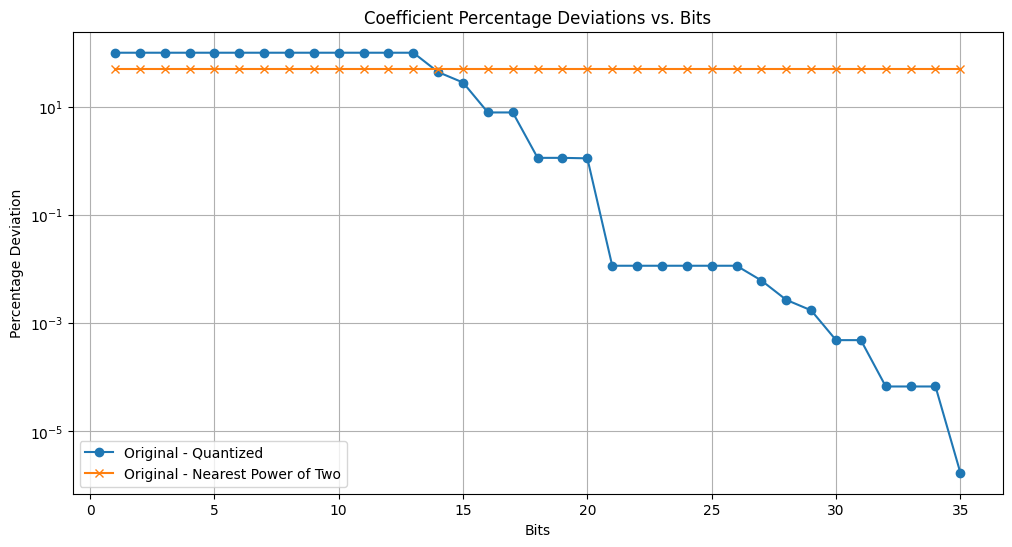

In [ ]:
# Function to quantize coefficients to the nearest power of two
def quantize_to_nearest_power_of_two(coefficients):
    """ Quantize coefficients to the nearest power of two """
    # Find the exponent for the closest power of two
    exponents = np.floor(np.log2(np.abs(coefficients)))
    # Calculate the power of two
    quantized = np.copysign(np.power(2.0, exponents), coefficients)
    return quantized

# Function to plot the deviations
def plot_percentage_deviation_vs_bits(fs, fc, order, bit_range):
    # Initialize lists to store percentage deviations
    percentage_deviation_original_quantized = []
    percentage_deviation_original_power_of_two = []

    # Calculate the original coefficients
    b_orig, a_orig = calculate_linkwitz_riley_coefficients(fs, fc, order)

    for bits in bit_range:
        # Standard quantization method
        b_quantized = quantize_coefficients(b_orig, bits)
        a_quantized = quantize_coefficients(a_orig, bits)

        # Power of two quantization method
        b_power_of_two = quantize_to_nearest_power_of_two(b_orig)
        a_power_of_two = quantize_to_nearest_power_of_two(a_orig)

        # Calculate percentage deviations for standard quantization
        deviation_original_quantized_b = np.abs((b_orig - b_quantized) / b_orig) * 100
        deviation_original_quantized_a = np.abs((a_orig - a_quantized) / a_orig) * 100

        # Calculate percentage deviations for power of two quantization
        deviation_original_power_of_two_b = np.abs((b_orig - b_power_of_two) / b_orig) * 100
        deviation_original_power_of_two_a = np.abs((a_orig - a_power_of_two) / a_orig) * 100

        # Store the maximum percentage deviations
        percentage_deviation_original_quantized.append(np.max(np.hstack((deviation_original_quantized_b, deviation_original_quantized_a))))
        percentage_deviation_original_power_of_two.append(np.max(np.hstack((deviation_original_power_of_two_b, deviation_original_power_of_two_a))))

    # Plotting percentage deviations
    plt.figure(figsize=(12, 6))
    plt.plot(bit_range, percentage_deviation_original_quantized, label='Original - Quantized', marker='o')
    plt.plot(bit_range, percentage_deviation_original_power_of_two, label='Original - Nearest Power of Two', marker='x')
    plt.xlabel('Bits')
    plt.ylabel('Percentage Deviation')
    plt.title('Coefficient Percentage Deviations vs. Bits')
    plt.yscale('log')  # Use logarithmic scale for better visualization
    plt.legend()
    plt.grid(True)
    plt.show()

# Sampling rate, cutoff frequency, and filter order
fs = 48000  # Hz
fc = 100   # Hz
order = 4   # 4th order Linkwitz-Riley filter
bit_range = range(1, 36)  # From 1 bit to 35 bits

# Plot the coefficient deviations
plot_percentage_deviation_vs_bits(fs, fc, order, bit_range)



In [ ]:
import numpy as np
import scipy.signal as signal

# Function to convert a coefficient to binary format with 'n' fractional bits
def coefficient_to_binary(coeff, n):
    binary_coeff = int(coeff * 2**n)
    return binary_coeff

# List of cutoff frequencies to demonstrate
cutoff_frequencies = [10, 50, 100, 500]

# Define the filter parameters
order = 4
fs = 48000  # Sample rate (Hz)

# Calculate and print coefficients for each cutoff frequency
for cutoff_freq in cutoff_frequencies:
    # Calculate the filter coefficients
    b, a = signal.butter(order, cutoff_freq / (fs / 2), btype='low')

    print(f"Coefficients for {cutoff_freq} Hz:")
    for i, coeff in enumerate(b):
        binary_coeff = coefficient_to_binary(coeff, 35)
        print(f"B[{i}]: {coeff:.20f} * 2^35 = {binary_coeff}")

    for i, coeff in enumerate(a):
        binary_coeff = coefficient_to_binary(coeff, 35)
        print(f"A[{i}]: {coeff:.20f} * 2^35 = {binary_coeff}")

    print()


Coefficients for 10 Hz:
B[0]: 0.00000000000018318589 * 2^35 = 0
B[1]: 0.00000000000073274356 * 2^35 = 0
B[2]: 0.00000000000109911535 * 2^35 = 0
B[3]: 0.00000000000073274356 * 2^35 = 0
B[4]: 0.00000000000018318589 * 2^35 = 0
A[0]: 1.00000000000000000000 * 2^35 = 34359738368
A[1]: -3.99657942627525386570 * 2^35 = -137321423453
A[2]: 5.98974412777420184284 * 2^35 = 205806041121
A[3]: -3.98974997086572980010 * 2^35 = -137086765152
A[4]: 0.99658526936971369992 * 2^35 = 34242409116

Coefficients for 50 Hz:
B[0]: 0.00000000011371216055 * 2^35 = 3
B[1]: 0.00000000045484864219 * 2^35 = 15
B[2]: 0.00000000068227296329 * 2^35 = 23
B[3]: 0.00000000045484864219 * 2^35 = 15
B[4]: 0.00000000011371216055 * 2^35 = 3
A[0]: 1.00000000000000000000 * 2^35 = 34359738368
A[1]: -3.98289714559732743737 * 2^35 = -136851303869
A[2]: 5.94883753887478583522 * 2^35 = 204400501429
A[3]: -3.94898291091677133835 * 2^35 = -135686019638
A[4]: 0.98304251945870813056 * 2^35 = 33777083773

Coefficients for 100 Hz:
B[0]: 0.

In [ ]:
import numpy as np
import scipy.signal as signal

# Function to convert a coefficient to binary format with 'n' fractional bits
def coefficient_to_binary(coeff, n):
    binary_coeff = int(coeff * 2**n)
    return binary_coeff

# Function to round a number to the nearest power of 2
def round_to_power_of_2(x):
    if x == 0:
        return 0
    return 2**int(np.ceil(np.log2(np.abs(x))))

# List of cutoff frequencies to demonstrate
cutoff_frequencies = [10, 50, 100, 500]

# Define the filter parameters
order = 4
fs = 48000  # Sample rate (Hz)

# Calculate and print coefficients for each cutoff frequency
for cutoff_freq in cutoff_frequencies:
    # Calculate the filter coefficients
    b, a = signal.butter(order, cutoff_freq / (fs / 2), btype='low')

    print(f"Coefficients for {cutoff_freq} Hz:")
    for i, coeff in enumerate(b):
        binary_coeff = coefficient_to_binary(coeff, 35)
        rounded_coeff = round_to_power_of_2(binary_coeff)
        rounding_percentage = ((rounded_coeff - binary_coeff) / (binary_coeff + 1e-10)) * 100
        print(f"B[{i}]: {coeff:.20f} * 2^35 = {binary_coeff}, Rounded to Power of 2: {rounded_coeff}, Rounding Percentage: {rounding_percentage:.2f}%")

    for i, coeff in enumerate(a):
        binary_coeff = coefficient_to_binary(coeff, 35)
        rounded_coeff = round_to_power_of_2(binary_coeff)
        rounding_percentage = ((rounded_coeff - binary_coeff) / (binary_coeff + 1e-10)) * 100
        print(f"A[{i}]: {coeff:.20f} * 2^35 = {binary_coeff}, Rounded to Power of 2: {rounded_coeff}, Rounding Percentage: {rounding_percentage:.2f}%")

    print()


Coefficients for 10 Hz:
B[0]: 0.00000000000018318589 * 2^35 = 0, Rounded to Power of 2: 0, Rounding Percentage: 0.00%
B[1]: 0.00000000000073274356 * 2^35 = 0, Rounded to Power of 2: 0, Rounding Percentage: 0.00%
B[2]: 0.00000000000109911535 * 2^35 = 0, Rounded to Power of 2: 0, Rounding Percentage: 0.00%
B[3]: 0.00000000000073274356 * 2^35 = 0, Rounded to Power of 2: 0, Rounding Percentage: 0.00%
B[4]: 0.00000000000018318589 * 2^35 = 0, Rounded to Power of 2: 0, Rounding Percentage: 0.00%
A[0]: 1.00000000000000000000 * 2^35 = 34359738368, Rounded to Power of 2: 34359738368, Rounding Percentage: 0.00%
A[1]: -3.99657942627525386570 * 2^35 = -137321423453, Rounded to Power of 2: 137438953472, Rounding Percentage: -200.09%
A[2]: 5.98974412777420184284 * 2^35 = 205806041121, Rounded to Power of 2: 274877906944, Rounding Percentage: 33.56%
A[3]: -3.98974997086572980010 * 2^35 = -137086765152, Rounded to Power of 2: 137438953472, Rounding Percentage: -200.26%
A[4]: 0.99658526936971369992 * 2^

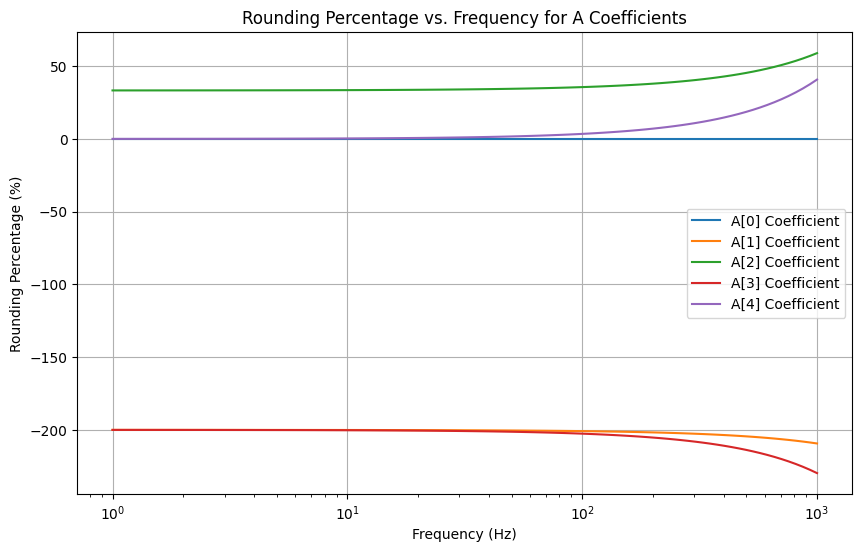

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Function to convert a coefficient to binary format with 'n' fractional bits
def coefficient_to_binary(coeff, n):
    binary_coeff = int(coeff * 2**n)
    return binary_coeff

# Function to round a number to the nearest power of 2
def round_to_power_of_2(x):
    if x == 0:
        return 0
    return 2**int(np.ceil(np.log2(np.abs(x))))

# Frequency range for the plot
frequencies = np.logspace(0, 3, num=100)  # From 1 Hz to 1000 Hz

# Define the filter parameters
order = 4
fs = 48000  # Sample rate (Hz)

# Initialize lists to store rounding percentages for A coefficients
a_rounding_percentages = [[] for _ in range(order + 1)]

# Calculate and store rounding percentages for each frequency
for freq in frequencies:
    # Calculate the A coefficients (ignore B coefficients)
    _, a = signal.butter(order, freq / (fs / 2), btype='low')

    for i, coeff in enumerate(a):
        binary_coeff = coefficient_to_binary(coeff, 35)
        rounded_coeff = round_to_power_of_2(binary_coeff)
        rounding_percentage = ((rounded_coeff - binary_coeff) / (binary_coeff + 1e-10)) * 100
        a_rounding_percentages[i].append(rounding_percentage)

# Plot rounding percentages for each A coefficient
plt.figure(figsize=(10, 6))
for i in range(order + 1):
    plt.semilogx(frequencies, a_rounding_percentages[i], label=f'A[{i}] Coefficient')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Rounding Percentage (%)')
plt.title('Rounding Percentage vs. Frequency for A Coefficients')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import scipy.signal as signal

# Function to convert a coefficient to binary format with 'n' fractional bits
def coefficient_to_binary(coeff, n):
    binary_coeff = int(coeff * 2**n)
    return binary_coeff

# Function to round a number to the nearest power of 2
def round_to_power_of_2(x):
    if x == 0:
        return 0
    return 2**int(np.ceil(np.log2(np.abs(x))))

# Function to add a power of 2 to a number
def add_power_of_2(x, n):
    return x + 2**n

# List of cutoff frequencies to demonstrate
cutoff_frequencies = [10, 50, 100, 500]

# Define the filter parameters
order = 4
fs = 48000  # Sample rate (Hz)

# Calculate and print coefficients for each cutoff frequency
for cutoff_freq in cutoff_frequencies:
    # Calculate the filter coefficients
    b, a = signal.butter(order, cutoff_freq / (fs / 2), btype='low')

    print(f"\nCoefficients for {cutoff_freq} Hz:")
    # Process b coefficients
    for i, coeff in enumerate(b):
        binary_coeff = coefficient_to_binary(coeff, 35)
        rounded_coeff = round_to_power_of_2(binary_coeff)
        added_coeff = add_power_of_2(binary_coeff, 35)
        rounding_percentage = ((rounded_coeff - binary_coeff) / (binary_coeff + 1e-10)) * 100
        adding_percentage = ((added_coeff - binary_coeff) / (binary_coeff + 1e-10)) * 100
        print(f"B[{i}]: {coeff:.20f} * 2^35 = {binary_coeff}, "
              f"Rounded to Power of 2: {rounded_coeff}, Rounding Percentage: {rounding_percentage:.2f}%, "
              f"Added 2^35: {added_coeff}, Adding Percentage: {adding_percentage:.2f}%")

    # Process a coefficients
    for i, coeff in enumerate(a):
        binary_coeff = coefficient_to_binary(coeff, 35)
        rounded_coeff = round_to_power_of_2(binary_coeff)
        added_coeff = add_power_of_2(binary_coeff, 35)
        rounding_percentage = ((rounded_coeff - binary_coeff) / (binary_coeff + 1e-10)) * 100
        adding_percentage = ((added_coeff - binary_coeff) / (binary_coeff + 1e-10)) * 100
        print(f"A[{i}]: {coeff:.20f} * 2^35 = {binary_coeff}, "
              f"Rounded to Power of 2: {rounded_coeff}, Rounding Percentage: {rounding_percentage:.2f}%, "
              f"Added 2^35: {added_coeff}, Adding Percentage: {adding_percentage:.2f}%")



Coefficients for 10 Hz:
B[0]: 0.00000000000018318589 * 2^35 = 0, Rounded to Power of 2: 0, Rounding Percentage: 0.00%, Added 2^35: 34359738368, Adding Percentage: 34359738368000000000000.00%
B[1]: 0.00000000000073274356 * 2^35 = 0, Rounded to Power of 2: 0, Rounding Percentage: 0.00%, Added 2^35: 34359738368, Adding Percentage: 34359738368000000000000.00%
B[2]: 0.00000000000109911535 * 2^35 = 0, Rounded to Power of 2: 0, Rounding Percentage: 0.00%, Added 2^35: 34359738368, Adding Percentage: 34359738368000000000000.00%
B[3]: 0.00000000000073274356 * 2^35 = 0, Rounded to Power of 2: 0, Rounding Percentage: 0.00%, Added 2^35: 34359738368, Adding Percentage: 34359738368000000000000.00%
B[4]: 0.00000000000018318589 * 2^35 = 0, Rounded to Power of 2: 0, Rounding Percentage: 0.00%, Added 2^35: 34359738368, Adding Percentage: 34359738368000000000000.00%
A[0]: 1.00000000000000000000 * 2^35 = 34359738368, Rounded to Power of 2: 34359738368, Rounding Percentage: 0.00%, Added 2^35: 68719476736, 

In [ ]:
import numpy as np
import scipy.signal as signal

# Function to convert a coefficient to binary format with 'n' fractional bits
def coefficient_to_binary(coeff, n):
    binary_coeff = int(coeff * 2**n)
    return binary_coeff

# Function to round a number to the nearest power of 2
def round_to_power_of_2(x):
    if x == 0:
        return 0
    return 2**int(np.ceil(np.log2(np.abs(x))))

# Function to add a power of 2 to a number
def add_power_of_2(x, n):
    return x + 2**n

# List of cutoff frequencies to demonstrate
cutoff_frequencies = [10, 50, 100, 500]

# Define the filter parameters
order = 4
fs = 48000  # Sample rate (Hz)

# Calculate and print coefficients for each cutoff frequency
for cutoff_freq in cutoff_frequencies:
    # Calculate the filter coefficients
    b, a = signal.butter(order, cutoff_freq / (fs / 2), btype='low')

    print(f"\nCoefficients for {cutoff_freq} Hz:")
    for i, coeff in enumerate(b):
        binary_coeff = coefficient_to_binary(coeff, 35)
        added_coeff = add_power_of_2(binary_coeff, 35)
        rounded_added_coeff = round_to_power_of_2(added_coeff)
        print(f"B[{i}]: {coeff:.20f}, Binary: {binary_coeff}, Added 2^35: {added_coeff}, Rounded to Power of 2: {rounded_added_coeff}")

    for i, coeff in enumerate(a):
        binary_coeff = coefficient_to_binary(coeff, 35)
        added_coeff = add_power_of_2(binary_coeff, 35)
        rounded_added_coeff = round_to_power_of_2(added_coeff)
        print(f"A[{i}]: {coeff:.20f}, Binary: {binary_coeff}, Added 2^35: {added_coeff}, Rounded to Power of 2: {rounded_added_coeff}")



Coefficients for 10 Hz:
B[0]: 0.00000000000018318589, Binary: 0, Added 2^35: 34359738368, Rounded to Power of 2: 34359738368
B[1]: 0.00000000000073274356, Binary: 0, Added 2^35: 34359738368, Rounded to Power of 2: 34359738368
B[2]: 0.00000000000109911535, Binary: 0, Added 2^35: 34359738368, Rounded to Power of 2: 34359738368
B[3]: 0.00000000000073274356, Binary: 0, Added 2^35: 34359738368, Rounded to Power of 2: 34359738368
B[4]: 0.00000000000018318589, Binary: 0, Added 2^35: 34359738368, Rounded to Power of 2: 34359738368
A[0]: 1.00000000000000000000, Binary: 34359738368, Added 2^35: 68719476736, Rounded to Power of 2: 68719476736
A[1]: -3.99657942627525386570, Binary: -137321423453, Added 2^35: -102961685085, Rounded to Power of 2: 137438953472
A[2]: 5.98974412777420184284, Binary: 205806041121, Added 2^35: 240165779489, Rounded to Power of 2: 274877906944
A[3]: -3.98974997086572980010, Binary: -137086765152, Added 2^35: -102727026784, Rounded to Power of 2: 137438953472
A[4]: 0.996